# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\dganguli\AppData\Local\Temp\ipykernel_41612\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

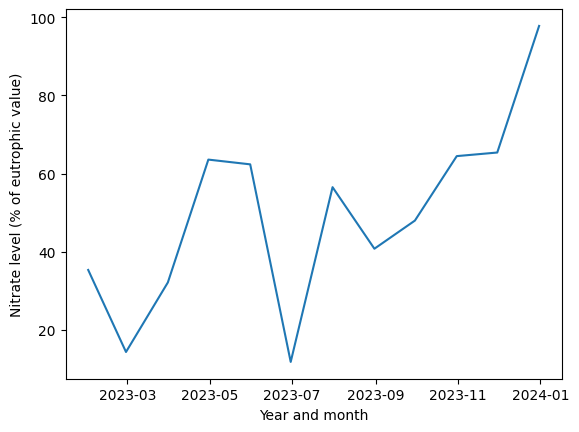

In [4]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\dganguli\AppData\Local\Temp\ipykernel_41612\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

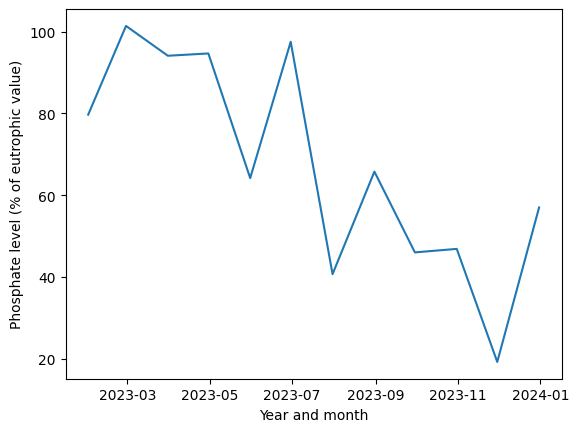

In [5]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

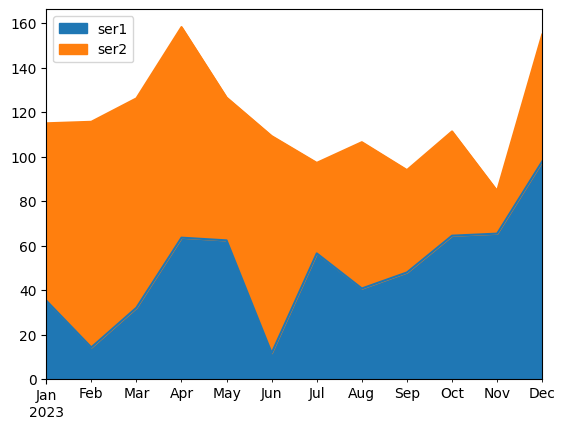

In [6]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

Ans: This NBA dataset was found by one of my teammates during first semester. I will perform the above tasks on this dataset

In [7]:
import os
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
file_path = "/Users/dganguli/Downloads/NBA/salaries_1985to2018.csv"
nba_df = pd.read_csv(file_path)
nba_df.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings



- Find correlations between pairs of variables.

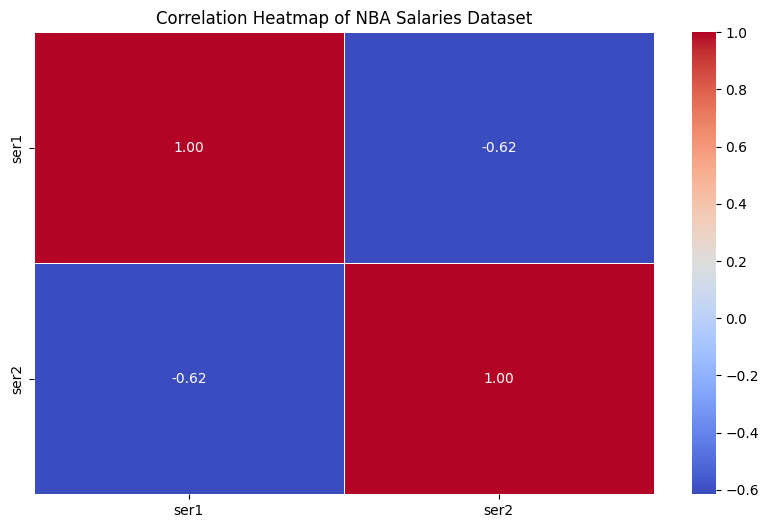

In [9]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of NBA Salaries Dataset")
plt.show()

There is correlation between season_start and season_end but that is kind of obvious.

Though it is not very strong but there is correlation between seasons (start and end) and the salary of players. There is a possibility of a positive linear correlation between these two attributes. Lets explore it through scatter plot

- Draw scatterplots, especially when the correlation is large.

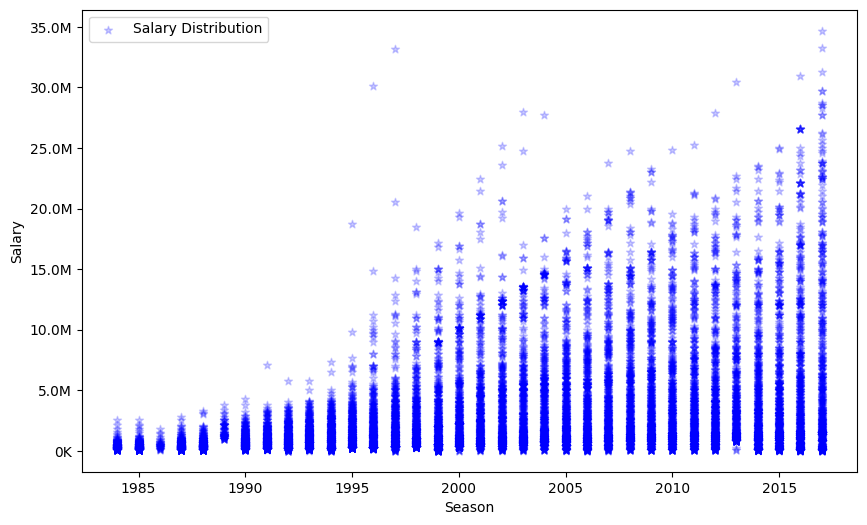

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

season_start = nba_df['season_start']
salary = nba_df['salary']

plt.figure(figsize=(10, 6))
plt.scatter(season_start, salary, color='blue', alpha=0.2, marker='*')

ax = plt.gca()  # Get current Axes
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

plt.xlabel("Season")
plt.ylabel("Salary")
plt.legend(["Salary Distribution"])
plt.show()


As you can see the pattern over the years, gradually every year player's salary is increasing almost linearly but with some noise. Let's check out some metrics.

In [11]:
s1985=nba_df[nba_df["season_start"] == 1985]['salary'].sum()
print(f"{s1985:,.0f}")

109,550,605


In [12]:
salary_by_season = nba_df.groupby("season_start")["salary"].sum()

# Format the salary values in K or M
formatted_salary = salary_by_season.apply(lambda x: f"{x/1e6:.1f}M" if x >= 1e6 else f"{x/1e3:.0f}K")

print(formatted_salary)


season_start
1984      83.7M
1985     109.6M
1986      21.7M
1987     139.1M
1988     169.5M
1989     106.9M
1990     293.6M
1991     369.3M
1992     429.0M
1993     500.3M
1994     568.6M
1995     672.9M
1996     799.2M
1997     941.9M
1998    1061.3M
1999    1314.3M
2000    1501.5M
2001    1558.6M
2002    1669.0M
2003    1672.1M
2004    1771.3M
2005    1896.6M
2006    1938.2M
2007    2062.8M
2008    2158.0M
2009    2112.8M
2010    2024.4M
2011    2007.6M
2012    2102.8M
2013    1994.9M
2014    2182.2M
2015    2340.7M
2016    2937.2M
2017    3312.1M
Name: salary, dtype: object


- Draw pairplots.

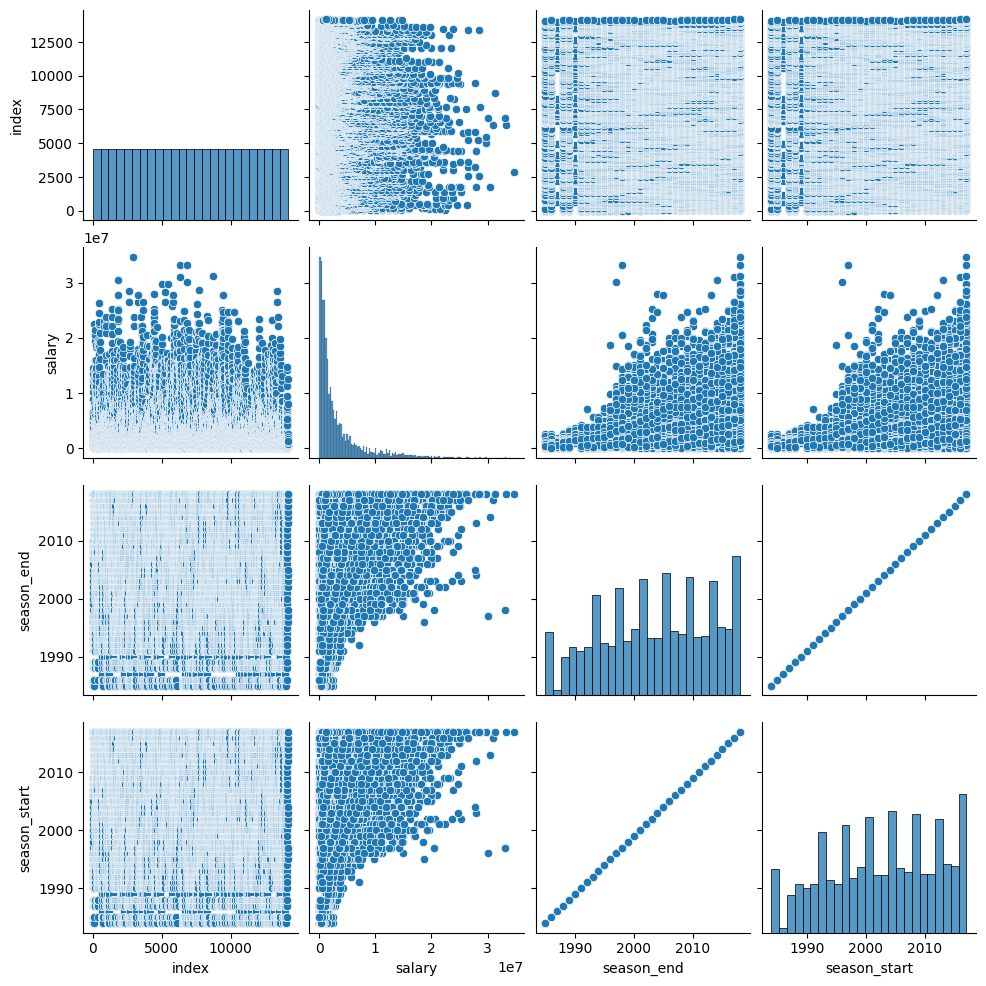

In [13]:
sns.pairplot(nba_df)

Row one is not important as it shows the charts against "index" which is nothing but the sorting order. So I will copy the dataframe and drop the index column from the new dataframe.

In [14]:
nba_df_cp=nba_df.copy()
#nba_df_cp['index'].drop(axis='columns')
nba_df_cp.drop(labels='index',axis='columns',inplace=True)
nba_df_cp


,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings
...,...,...,...,...,...,...,...
14158,NBA,zipsepa01,750000,2016-17,2017,2016,Chicago Bulls
14159,NBA,zipsepa01,1312611,2017-18,2018,2017,Chicago Bulls
14160,NBA,zizican01,1645200,2017-18,2018,2017,Cleveland Cavaliers
14161,NBA,zubaciv01,1034956,2016-17,2017,2016,Los Angeles Lakers


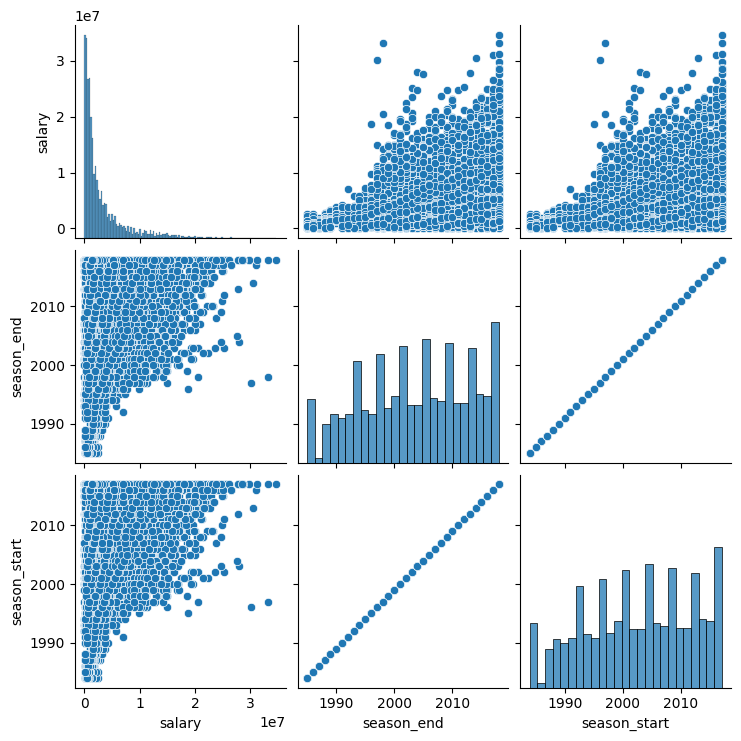

In [15]:
sns.pairplot(nba_df_cp)

On the diagonals of the pair plot, 3 bar charts for the 3 data series , salary, season end and season_start are representing their frequency for the X axis at the bottom. Row 1 column 1 salary bar chart tells that there are most number of players between 0 to 10 million range than other ranges (mostly below 5 million). Row 2 column 2 season end suggest that overall there is a very slight increase in number or players every season but there is another pattern visibile which says after every two buckets after 1995 there is a big jump on number of players playing on that season start or season end (same thing)

On row 2 column 1 and row 3 column 1 (also row 1 col 2 and row 1 column 3) almost suggest the same scatter plot pattern between season_start or season_end and salary because season_start and season_end are two numerical fields which are highly correlated(linearly) as season_end is season_start+1. The scatter plot suggests as the year passed the salary of players increased and we can see more numbers of player's salaries are beyond 20 millon mark.

As stated in the above paragraph, season_start and season_end have a linear relationship which is clearly depicted in row 2 column 3 and row 3 column 2 

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

There is just one metrics in this file, so could not make an area plot out of just one metrics.

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'season_end'}>,
        <Axes: title={'center': 'season_start'}>]], dtype=object)

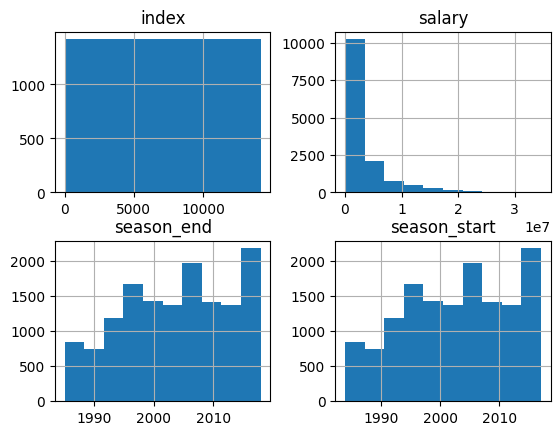

In [16]:
nba_df.hist()

<Axes: >

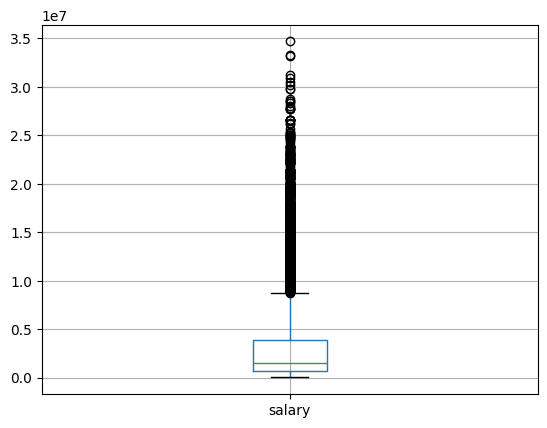

In [17]:
nba_df.boxplot(column='salary')

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

Figure 3.21 Page 95

ticket_received is [160, 170, 250, 150, 160, 175, 150, 200, 170, 152, 165, 185] and ticket processed is [160, 170, 250, 150, 160, 175, 140, 115, 148, 125, 140, 160]


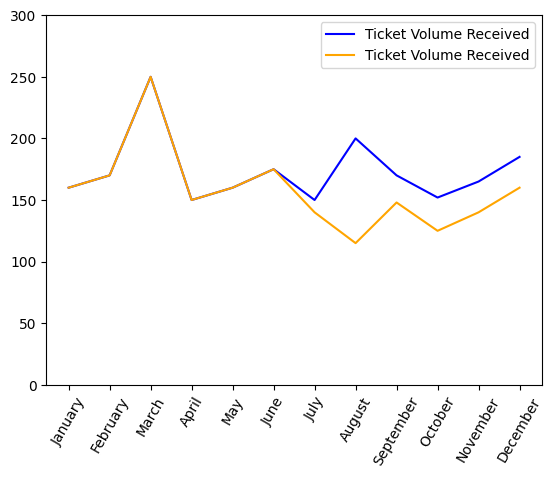

In [21]:
import calendar
import matplotlib.pyplot as plt

months = np.array(list(calendar.month_name[1:]))

ticket_received=[160,170,250,150,160,175,150,200,170,152,165,185]
ticket_processed=[160,170,250,150,160,175,140,115,148,125,140,160]

print(f'ticket_received is {ticket_received} and ticket processed is {ticket_processed}')

plt.plot(months,ticket_received, linestyle='-', color='blue',label='Ticket Volume Received')
plt.plot(months,ticket_processed, linestyle='-', color='orange',label='Ticket Volume Received')
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylim(0, 300)
plt.legend()
plt.show()